In [126]:
import numpy as np
from matplotlib import pyplot as plt
from neural_network import *
from problem import *
from functools import partial

## Базовая нейронная сеть с сигмоидальными функциями

In [6]:
nn1 = NeuralNetwork([1,3,1], output=False)

In [7]:
x_nn1, nn1_history = nn1.gradient_descent(ts[1:-1], 0.1, 0, 0, J_target_grad, J_target, 400, retall=True)

x_nn1_full = np.concatenate(([x_0], x_nn1, [x_f]))

nn1_errors = [np.average(np.abs(x_exact(ts)[1:-1] - nn1_history[i][0])) 
               for i in range(len(nn1_history))]

## Нейронная сеть с тригонометрическими функциями и регуляризацией

In [19]:
def cosine_n(x, n):
    return np.cos(n * x)

def cosine_n_prime(x, n):
    return -1 * n * np.sin(n * x)

def identity(x):
    return x

def identity_prime(x):
    return 1

L2 = 10
func1 = [partial(cosine_n, n=n) for n in range(L2)]
func1_prime = [partial(cosine_n_prime, n=n) for n in range(L2)]

func = [func1, identity]
func_prime = [func1_prime, identity_prime]

In [146]:
nn2 = NeuralNetwork([1,L2,1], act_func=(func, func_prime), fix_first_layer=True, output=False)

In [150]:
x_nn2, nn2_history = nn2.gradient_descent(ts[1:-1], 0.001, 0.001, 0.001, J_target_grad, J_target, 100, retall=True)

x_nn2_full = np.concatenate(([x_0], x_nn2, [x_f]))

nn2_errors = [np.average(np.abs(x_exact(ts)[1:-1] - nn2_history[i][0])) 
               for i in range(len(nn2_history))]

In [151]:
#print(nn2.weights)
print(nn2_errors[-1])
print(nn2_history[-1][1])

print(x_exact(ts) - x_nn2_full)

0.009003397487711114
0.21628809839298185
[ 0.         -0.00064988  0.00570619  0.01044744  0.01366622  0.01548622
  0.01605847  0.0155564   0.01417024  0.01210083  0.00955315  0.00672973
  0.00382428  0.00101557 -0.00153798 -0.00370305 -0.00537516 -0.00648136
 -0.0069818  -0.00687002 -0.00617204 -0.00494432 -0.00327049 -0.00125716
  0.00097113  0.00327771  0.00551996  0.00755582  0.00925034  0.01048199
  0.0111486   0.01117267  0.01050595  0.00913296  0.00707358  0.0043844
  0.00115892 -0.00247343 -0.00634942 -0.01027522 -0.01403059 -0.01737379
 -0.02004724 -0.02178353 -0.02231181 -0.02136409 -0.01868151 -0.01402026
 -0.00715695  0.00210658  0.        ]


## Сравнение сходимостей разных алгоритмов

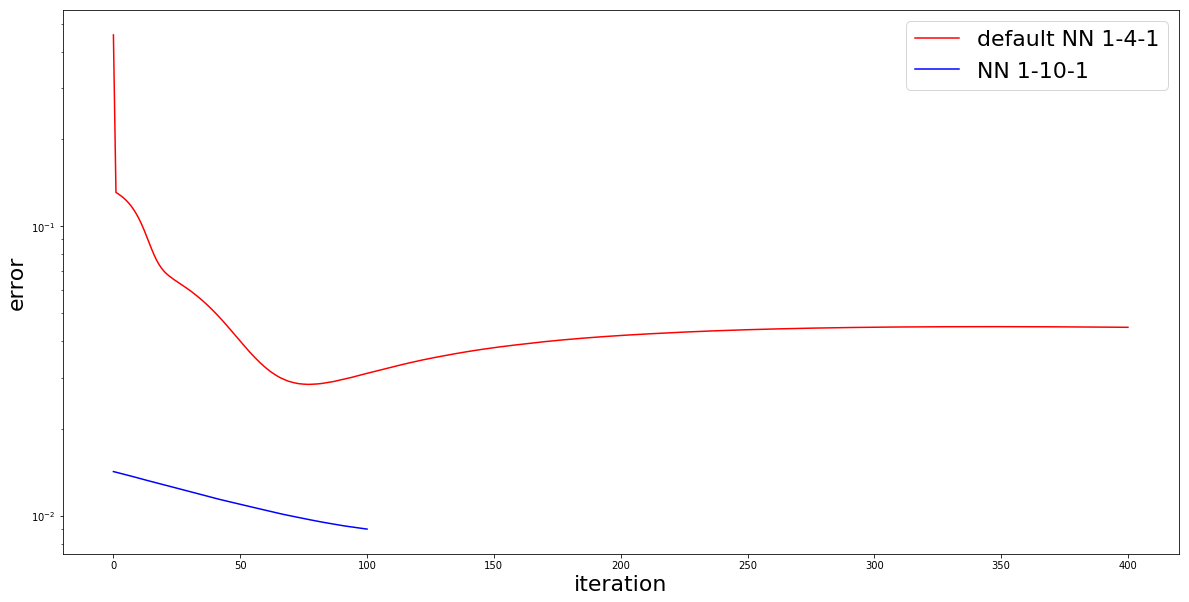

In [154]:
plt.figure(figsize=(20,10))
plt.plot(range(len(nn1_errors)), nn1_errors, color='red', label='default NN 1-4-1')
plt.plot(range(len(nn2_errors)), nn2_errors, color='blue', label='NN 1-10-1')
plt.xlabel('iteration', fontsize=22)
plt.ylabel('error', fontsize=22)
plt.yscale('log')
plt.legend(fontsize=22)
plt.show()

## Сравнение точного и численного решений

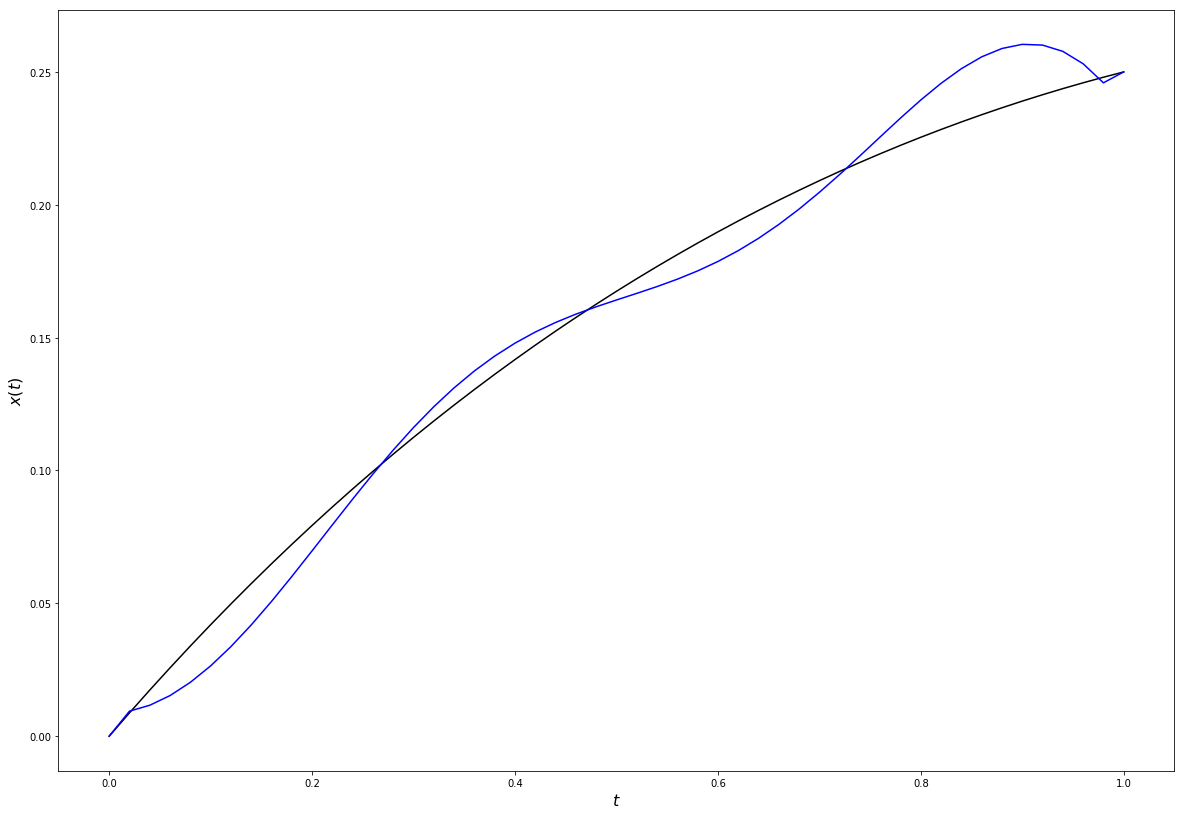

In [153]:
plt.figure(figsize=(20,14))
plt.plot(ts, x_exact(ts), color='black')
#plt.plot(ts, x_nn1_full, color='red')
plt.plot(ts, x_nn2_full, color='blue')
plt.xlabel('$t$', fontsize=16)
plt.ylabel('$x(t)$', fontsize=16)
plt.show()